In [1]:
# ! pip install ipympl 

In [2]:
import os
os.chdir('../')

import numpy as np
import torch

import matplotlib.pyplot as plt
# %matplotlib inline
%matplotlib ipympl
%config InlineBackend.figure_format='retina'
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

from src.hands.tools import get_spatial_graph
from src.hands.vis import vis_matrix
from src.hands.utils import read_hand_pose_txt

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%load_ext autoreload
%autoreload 2

In [3]:
# M₀₀       M₀₁        M₀₂       M₀₃       M₁₀       M₁₁        M₁₂       M₁₃        M₂₀        M₂₁       M₂₂       M₂₃       M₃₀ M₃₁ M₃₂ M₃₃
# -------------------------------------------------------------------------------------------------------------------------------------------
# 0.947...  -0.010...  0.318...  0.081...  0.053...  0.990...  -0.125...  -0.003...  -0.314...  0.135...  0.939...  0.042...  0   0   0   1

In [4]:
num_node = 26
self_link = [(i, i) for i in range(num_node)]
inward = [
    [0, 1],
    [1, 2], [2, 3], [3, 4], [4, 5], # Thumb
    [1, 6], [6, 7], [7, 8], [8, 9], [9, 10], # Index
    [1, 11], [11, 12], [12, 13], [13, 14], [14, 15], # Middle
    [1, 16], [16, 17], [17, 18], [18, 19], [19, 20], # Ring
    [1, 21], [21, 22], [22, 23], [23, 24], [24, 25] # Pinky
]
outward = [(j, i) for (i, j) in inward]
neighbor = inward + outward

In [5]:
! ls /Users/artemmerinov/data/holoassist/hands/R034-12July-Switch/Export_py/Hands

Left_sync.txt  Right_sync.txt


In [6]:
left_hand_array = read_hand_pose_txt("/Users/artemmerinov/data/holoassist/hands/R034-12July-Switch/Export_py/Hands/Left_sync.txt")
right_hand_array = read_hand_pose_txt("/Users/artemmerinov/data/holoassist/hands/R034-12July-Switch/Export_py/Hands/Right_sync.txt")

xyz_left_array = left_hand_array[:, 4:].reshape(-1, 3, 26).transpose(0, 2, 1)
xyz_right_array = right_hand_array[:, 4:].reshape(-1, 3, 26).transpose(0, 2, 1)

In [7]:
xyz_left_array.shape

(4366, 26, 3)

In [8]:
xyz_right_array[123]

array([[ 1.74237378, -0.26832345,  0.60343598],
       [ 1.74237378, -0.26832345,  0.60343598],
       [ 1.74237378, -0.26832345,  0.60343598],
       [ 1.74237378, -0.26832345,  0.60343598],
       [ 1.74237378, -0.26832345,  0.60343598],
       [ 1.74237378, -0.26832345,  0.60343598],
       [ 1.74237378, -0.26832345,  0.60343598],
       [ 1.74237378, -0.26832345,  0.60343598],
       [ 1.74237378, -0.26832345,  0.60343598],
       [ 1.74237378, -0.26832345,  0.60343598],
       [ 1.74237378, -0.26832345,  0.60343598],
       [ 1.74237378, -0.26832345,  0.60343598],
       [ 1.74237378, -0.26832345,  0.60343598],
       [ 1.74237378, -0.26832345,  0.60343598],
       [ 1.74237378, -0.26832345,  0.60343598],
       [ 1.74237378, -0.26832345,  0.60343598],
       [ 1.74237378, -0.26832345,  0.60343598],
       [ 1.74237378, -0.26832345,  0.60343598],
       [ 1.74237378, -0.26832345,  0.60343598],
       [ 1.74237378, -0.26832345,  0.60343598],
       [ 1.74237378, -0.26832345,  0.603

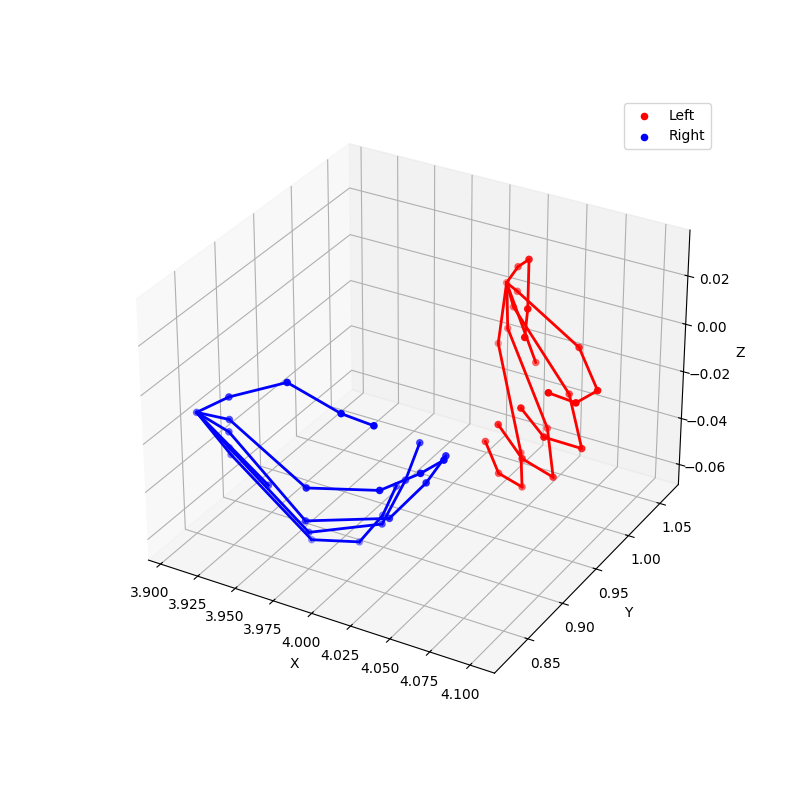

In [9]:
time_idx = 1234
xyz_left = xyz_left_array[time_idx]
xyz_right = xyz_right_array[time_idx]

# Create a 3D plot
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter(xyz_left[:, 0], xyz_left[:, 1], xyz_left[:, 2], color="red", label="Left")
ax.scatter(xyz_right[:, 0], xyz_right[:, 1], xyz_right[:, 2], color="blue", label="Right")

# Plot the connections
for joint in inward:
    for points, color in zip([xyz_left, xyz_right], ["red", "blue"]):
        start = points[joint[0]]
        end = points[joint[1]]
        ax.plot([start[0], end[0]], [start[1], end[1]], [start[2], end[2]], color=color, lw=2)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.show()

# Make animation

In [10]:
def calculate_axis_limits(xyz_arr):
    # x_lims = np.min(xyz_arr[:,0]), np.max(xyz_arr[:,0])
    # y_lims = np.min(xyz_arr[:,1]), np.max(xyz_arr[:,1])
    # z_lims = np.min(xyz_arr[:,2]), np.max(xyz_arr[:,2])

    x_lims = np.quantile(xyz_both_array[:,0], q=[0.25, 0.75])
    y_lims = np.quantile(xyz_both_array[:,1], q=[0.25, 0.75])
    z_lims = np.quantile(xyz_both_array[:,2], q=[0.25, 0.75])

    # x_lims = np.array(x_lims)
    # y_lims = np.array(y_lims)
    # z_lims = np.array(z_lims)

    return x_lims, y_lims, z_lims

xyz_both_array = np.concatenate([xyz_left_array, xyz_right_array], axis=0)
x_lims, y_lims, z_lims = calculate_axis_limits(xyz_both_array)
x_lims, y_lims, z_lims

(array([0.03080524, 3.92166151]),
 array([0.0440761 , 3.87713349]),
 array([0.05710552, 3.89821463]))

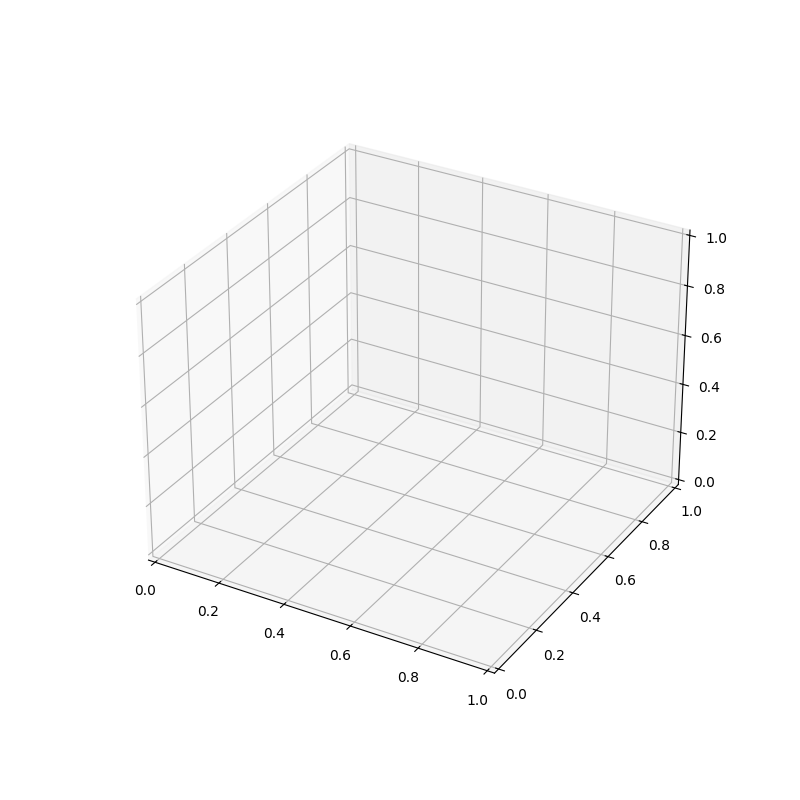

In [19]:
def plot_hand(ax, points, joints, color):
    
    # Plot the points
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], color=color)

    # plot limits
    # ax.scatter(x_lims[0], y_lims[0], z_lims[0], color='white')
    # ax.scatter(x_lims[1], y_lims[1], z_lims[1], color='white')

    # plot joints
    for joint in joints:
        start = points[joint[0]]
        end = points[joint[1]]
        ax.plot([start[0], end[0]], [start[1], end[1]], [start[2], end[2]], color=color, lw=2)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

times = np.linspace(2000, 2200, 10, dtype=int)

def update(frame):
    ax.clear()
    time = times[frame]
    xyz_left = xyz_left_array[time]
    xyz_right = xyz_right_array[time]
    for points, color in zip([xyz_left, xyz_right], ["red", "blue"]):
        plot_hand(ax, points, inward, color)

ani = FuncAnimation(fig, update, frames=len(times), interval=200, repeat=False)
plt.show()